The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data cannot be provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015


In [1]:
import pandas as pd
import numpy as np
from random import sample
#import libraries

In [2]:
df=pd.read_csv("creditcard.csv")
#Reading the dataset in a dataframe using Pandas

In [3]:
df.head()
#Peek into what the dataset looks like

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
list(df.columns.values)
# list of features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [6]:
df.shape

(284807, 31)

In [7]:
# give a count of fraudulent vs. genuine transactions and the ratio
x=df.groupby('Class').size()
print('There are', x[0], 'genuine transactions and', x[1], 'fraudulent transactions.')
print( '%.3f' % (x[1]/x[0]*100)+'%','of the transcations are fraudulent')

There are 284315 genuine transactions and 492 fraudulent transactions.
0.173% of the transcations are fraudulent


The problem is imbalanced - one class is highly represented, whereas the other only sparsely. Such problems require distinct learning techniques to deal with and the usual metric of accuracy is misleading. Indeed, if we classify ALL transactions as genuine we will have 99% accuracy!

# Credit scoring as a standard classification problem

Standard binary classification methods do not take transaction costs into account, assuming constant cost of misclassification errors. This approach is unrealistic in many real-world applications. For example in credit card
fraud detection, failing to detect a fraudulent transaction may have an economical impact from a few to thousands of Euros, depending on the particular transaction and card holder.

We shall now apply standard classification methods to the problem at hand.

In [8]:
# prepare the data for learning
features=list(df.columns.values)
del features[-1]
data=df[features]
target=np.ravel(df[['Class']].values.tolist())

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(data, target)

In [10]:
# Fit the classifiers using the training dataset
classifiers = {"RF": {"f": RandomForestClassifier()},
               "DT": {"f": DecisionTreeClassifier()},
               "LR": {"f": LogisticRegression()}}

for model in classifiers.keys():
    # Fit
    classifiers[model]["f"].fit(X_train, y_train)
    # Predict
    classifiers[model]["c"] = classifiers[model]["f"].predict(X_test)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(X_test)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(X_train)

In [11]:
# Evaluate the performance
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
measures = {"f1": f1_score, "pre": precision_score, 
            "rec": recall_score, "acc": accuracy_score}
results = pd.DataFrame(columns=measures.keys())

# Evaluate each model in classifiers
for model in classifiers.keys():
    results.loc[model] = [measures[measure](y_test, classifiers[model]["c"]) for measure in measures.keys()]

print(results)

         acc       rec        f1       pre
DT  0.999228  0.776699  0.744186  0.714286
LR  0.999129  0.621359  0.673684  0.735632
RF  0.999663  0.815534  0.875000  0.943820


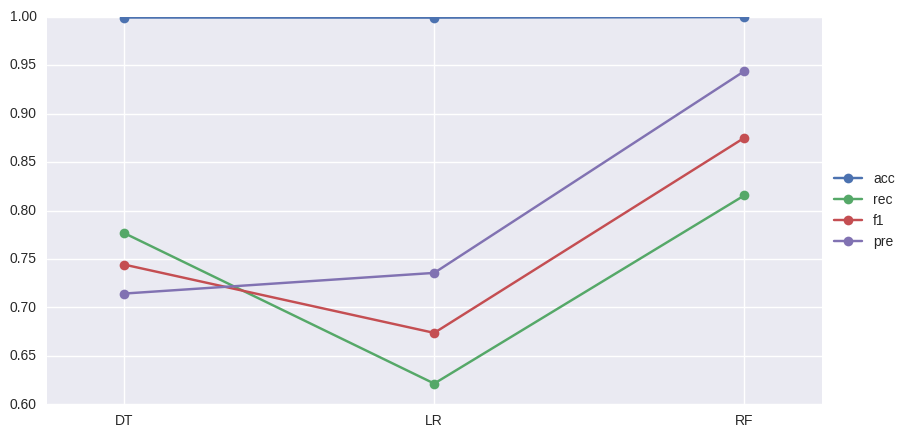

In [12]:
# Plot the results
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

figsize(10, 5)
ax = plt.subplot(111)

ind = np.arange(results.shape[0])
width = 0.2
l = ax.plot(ind, results, "-o")
plt.legend(iter(l), results.columns.tolist(), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim([-0.25, ind[-1]+.25])
ax.set_xticks(ind)
ax.set_xticklabels(results.index)
plt.show()

Nevertheless, none of these measures takes into account the business and economical realities that take place in credit scoring. Costs that the financial institution had incurred to acquire customers, or the expected profit due to a particular client, are not considered in the evaluation of the different models.

# Example-Dependent Cost-Sensitive Credit Scoring

In cost-sensitive classification, each example has its own cost-matrix. A cost-matrix describes the penalties for false positives, false negatives and correct classification.

We shall now apply example-dependent cost-sensitive classification to the problem at hand.

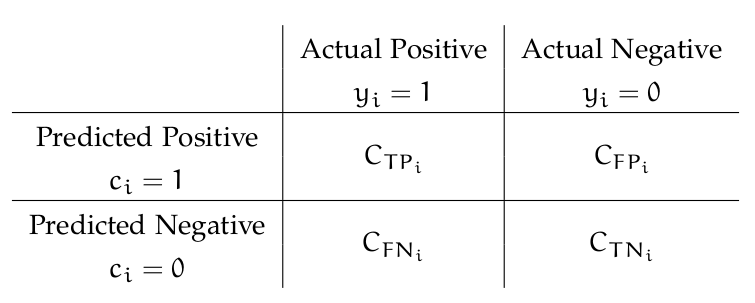

In [13]:
from IPython.display import Image
Image(filename='cost_mat.png')
# Structure of a cost-matrix

Since the cost-matrices are unspecified, it will be up to us to come up with practical choices of the matrix. We will set the diagonal to zero. This represents there being no penalty for correct prediction. A rule-of-thumb ratio for overlooking a fraudulent transaction vs. freezing a genuine one is that the former is ten times worse. The scale is set by the cash amount of the transaction.

In [14]:
# create the cost_matrix
num_transactions = len(df.index)
cost_mat=np.ndarray(shape=(num_transactions,4))
for i in range(0,num_transactions):
    amount = df.loc[i,'Amount']
    cost_mat[i]=[amount, amount*10, 0 ,0]

In [15]:
%%capture
!pip install costcla
# installs example-dependent cost-sensitive classification library (http://albahnsen.com/CostSensitiveClassification/)

In [40]:
X_train, X_test, y_train, y_test, cost_mat_train, cost_mat_test = \
train_test_split(data, target,cost_mat)

# Fit the classifiers using the training dataset
classifiers = {"RF": {"f": RandomForestClassifier()},
               "DT": {"f": DecisionTreeClassifier()},
               "LR": {"f": LogisticRegression()}}
for model in classifiers.keys():
    # Fit
    classifiers[model]["f"].fit(X_train, y_train)
    # Predict
    classifiers[model]["c"] = classifiers[model]["f"].predict(X_test)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(X_test)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(X_train)

In [41]:
from costcla.models import BayesMinimumRiskClassifier
ci_models = list(classifiers);

for model in ci_models:
    classifiers[model+"-BMR"] = {"f": BayesMinimumRiskClassifier()}
    # Fit
    classifiers[model+"-BMR"]["f"].fit(y_test, classifiers[model]["p"])  
    # Calibration must be made in a validation set
    # Predict
    classifiers[model+"-BMR"]["c"] = classifiers[model+"-BMR"]["f"].predict(classifiers[model]["p"], cost_mat_test)
    # Evaluate
    results.loc[model+"-BMR"] = 0
    results.loc[model+"-BMR", measures.keys()] = \
    [measures[measure](y_test, classifiers[model+"-BMR"]["c"]) for measure in measures.keys()]
    
print(results)

             acc       rec        f1       pre
DT      0.999228  0.776699  0.744186  0.714286
LR      0.999129  0.621359  0.673684  0.735632
RF      0.999663  0.815534  0.875000  0.943820
DT-BMR  0.999073  0.719697  0.742188  0.766129
LR-BMR  0.998848  0.560606  0.643478  0.755102
RF-BMR  0.999185  0.787879  0.781955  0.776119


The savings of using an algorithm are defined as the cost of the algorithm versus the cost of using no algorithm at all. More details can be found in 

Correa Bahnsen, A., Aouada, D., & Ottersten, B. (2014). Example-Dependent Cost-Sensitive Logistic Regression for Credit Scoring. In 2014 13th International Conference on Machine Learning and Applications (pp. 263–269). Detroit, USA: IEEE. http://doi.org/10.1109/ICMLA.2014.48

In [45]:
# Calculation of the cost and savings
from costcla.metrics import savings_score, cost_loss 
# Evaluate the savings for each model
results["sav"] = np.zeros(results.shape[0])
for model in classifiers.keys():
    results["sav"].loc[model] = savings_score(y_test, classifiers[model]["c"], cost_mat_test)

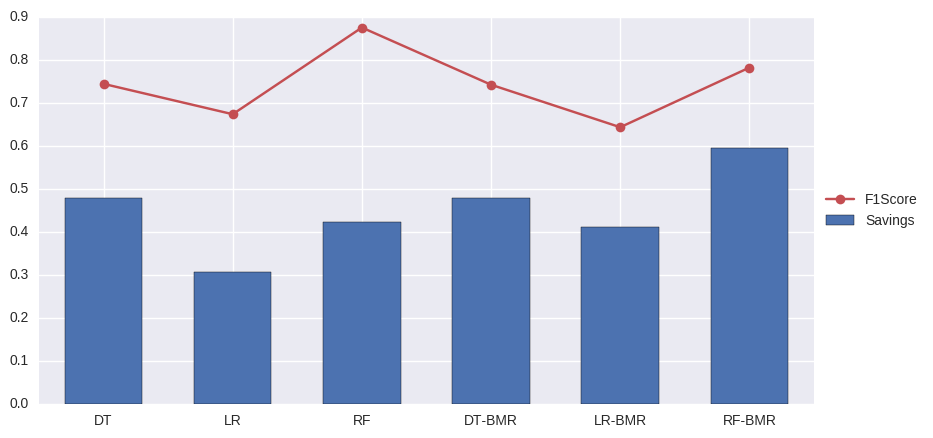

In [46]:
colors = sns.color_palette()
# Plot the results
ind = np.arange(results.shape[0])
figsize(10, 5)
ax = plt.subplot(111)
l = ax.plot(ind, results["f1"], "-o", label='F1Score', color=colors[2])
b = ax.bar(ind-0.3, results['sav'], 0.6, label='Savings', color=colors[0])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim([-0.5, ind[-1]+.5])
ax.set_xticks(ind)
ax.set_xticklabels(results.index)
plt.show()

We have learned that the most cost-effective algorithm for credit card fraud detection appears to be the Random Forests Bayes Minimum Risk Classifier.